In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os

csv_path = "./CSV/"
plt.rcParams['figure.figsize'] = [6, 6]

n_runs = len(os.listdir(csv_path))

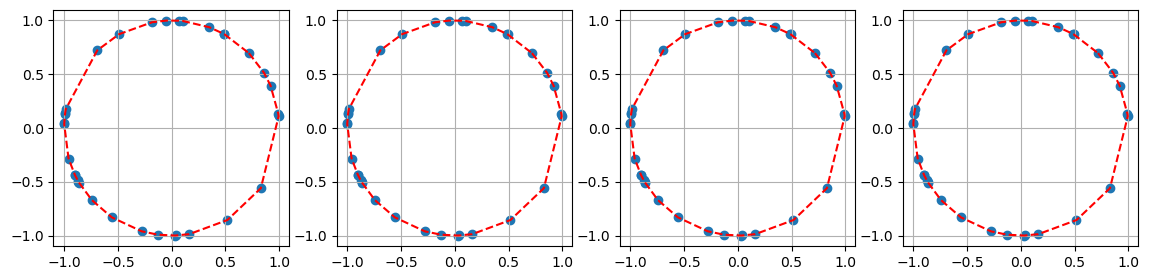

In [33]:
plt.figure().set_size_inches((14, 6))

for idx, directory in enumerate(sorted(os.listdir(csv_path))):
    
    plt.subplot(1, n_runs, idx + 1, aspect = 'equal')

    path = csv_path + directory + "/"

    Cities = np.loadtxt(path + "Ex9_1_Cities.csv", delimiter = ',')
    Cities_Coord = Cities[:, 1:]

    Path = np.loadtxt(path + "Ex9_1_Solution.csv", delimiter = ',')
    Path_Coord = []

    for i in Path:
        Path_Coord.append([Cities_Coord[int(i) - 1, 0], Cities_Coord[int(i) - 1, 1]])
    Path_Coord.append([Cities_Coord[0, 0], Cities_Coord[0, 1]])
    
    Path_Coord = np.asarray(Path_Coord)

    plt.scatter(Cities_Coord[:,0], Cities_Coord[:,1])
    plt.plot(Path_Coord[:,0], Path_Coord[:,1], 'r--')
    plt.grid(True)

plt.show()

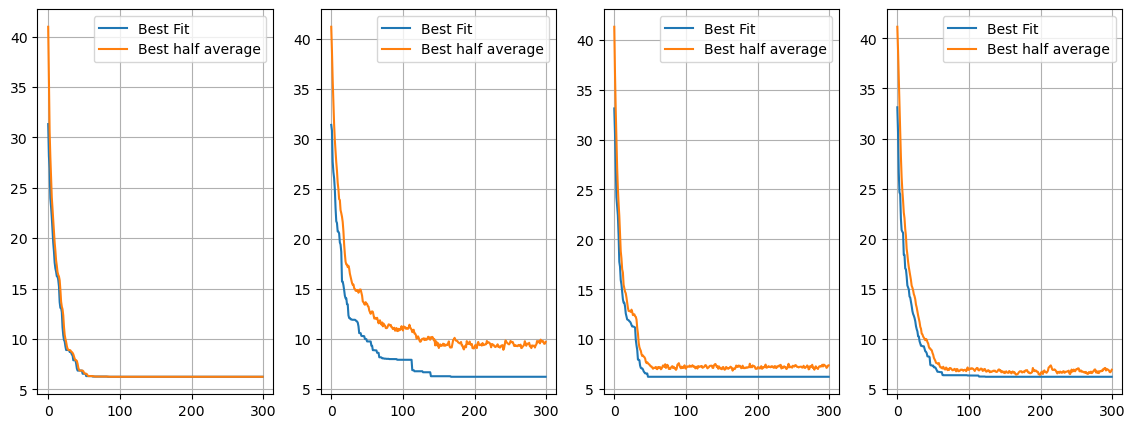

In [42]:
plt.figure().set_size_inches((14, 5))

for idx, directory in enumerate(sorted(os.listdir(csv_path))):
    
    plt.subplot(1, n_runs, idx + 1)

    path = csv_path + directory + "/"

    Hist = np.loadtxt(path + "Ex9_1_Hist.csv", delimiter = ',')

    plt.plot(Hist[:,0], label = "Best Fit")
    plt.plot(Hist[:,1], label = "Best half average")
    plt.grid(True)
    plt.legend()

plt.show()

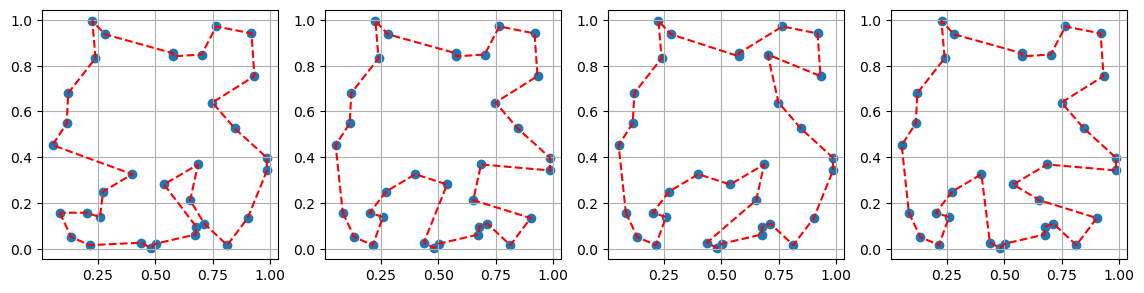

In [34]:
plt.figure().set_size_inches((14, 6))

for idx, directory in enumerate(sorted(os.listdir(csv_path))):
    
    plt.subplot(1, n_runs, idx + 1, aspect = 'equal')

    path = csv_path + directory + "/"

    Cities = np.loadtxt(path + "Ex9_2_Cities.csv", delimiter = ',')
    Cities_Coord = Cities[:, 1:]

    Path = np.loadtxt(path + "Ex9_2_Solution.csv", delimiter = ',')
    Path_Coord = []

    for i in Path:
        Path_Coord.append([Cities_Coord[int(i) - 1, 0], Cities_Coord[int(i) - 1, 1]])
    Path_Coord.append([Cities_Coord[0, 0], Cities_Coord[0, 1]])
    
    Path_Coord = np.asarray(Path_Coord)

    plt.scatter(Cities_Coord[:,0], Cities_Coord[:,1])
    plt.plot(Path_Coord[:,0], Path_Coord[:,1], 'r--')
    plt.grid(True)

plt.show()

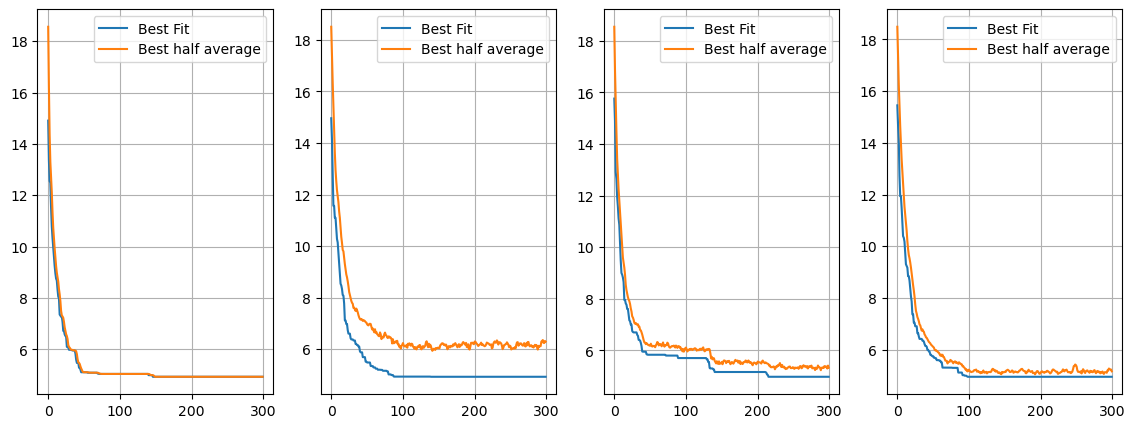

In [41]:
plt.figure().set_size_inches((14, 5))

for idx, directory in enumerate(sorted(os.listdir(csv_path))):
    
    plt.subplot(1, n_runs, idx + 1)

    path = csv_path + directory + "/"

    Hist = np.loadtxt(path + "Ex9_2_Hist.csv", delimiter = ',')

    plt.plot(Hist[:,0], label = "Best Fit")
    plt.plot(Hist[:,1], label = "Best half average")
    plt.grid(True)
    plt.legend()

plt.show()

0.1%, 4 => best avg gets clamped to best chromosomes => no variability
0.2%, 2 => best avg has a big distance from best chrom => too much variability?
0.2%, 4 => seems a good balance
0.1%, 2 => maybe best avg and best chrom too close?
